In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#2 С помощью встроенных функций работы с файлами формата *.csv открыть файл GlobalLandTemperaturesByCity.csv

def DataReading(name):
    data = pd.read_csv(name,sep=',')
    return data
    
#r'GlobalLandTemperaturesByCity.csv'
data = DataReading(r'GlobalLandTemperaturesByCity.csv')

In [3]:
data_russia = data.loc[data['Country'] == 'Russia']
data = 0
data_russia.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
30064,1820-08-01,13.221,2.706,Abakan,Russia,53.84N,91.36E
30065,1820-09-01,7.744,1.756,Abakan,Russia,53.84N,91.36E
30066,1820-10-01,-1.771,1.837,Abakan,Russia,53.84N,91.36E
30067,1820-11-01,-11.387,2.218,Abakan,Russia,53.84N,91.36E
30068,1820-12-01,-19.725,2.549,Abakan,Russia,53.84N,91.36E


In [4]:
#3. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для России.

years = pd.DatetimeIndex(data_russia['dt']).year.tolist()
stoletiya = [math.ceil(x / 100) for x in years]
data_russia.groupby(stoletiya)['AverageTemperature'].mean()

18    4.222465
19    2.861777
20    3.341254
21    4.733811
Name: AverageTemperature, dtype: float64

In [5]:
#4. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для города Белгород.

data_belgorod = data_russia.loc[data_russia['City'] == 'Belgorod']
years = pd.DatetimeIndex(data_belgorod['dt']).year.tolist()
stoletiya = [math.ceil(x / 100) for x in years]
data_belgorod.groupby(stoletiya)['AverageTemperature'].mean()

18    6.000699
19    5.707773
20    6.287855
21    7.877908
Name: AverageTemperature, dtype: float64

In [6]:
#5. Рассчитать максимальную и минимальную средние месячную и годовую температуры для города Абакан.

data_abakan = data_russia.loc[data_russia['City'] == 'Abakan']
years = pd.DatetimeIndex(data_abakan['dt']).year.tolist()

print('минимальная средняя месячная =', data_abakan['AverageTemperature'].min())
print('максимальная средняя месячная =', data_abakan['AverageTemperature'].max())
print('минимальная средняя годовая =', data_abakan.groupby(years)['AverageTemperature'].mean().min())
print('максимальная средняя годовая =', data_abakan.groupby(years)['AverageTemperature'].mean().max())


минимальная средняя месячная = -31.138
максимальная средняя месячная = 21.503
минимальная средняя годовая = -2.778
максимальная средняя годовая = 2.606583333333333


In [30]:
#6. Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.

data_arhangelsk = data_russia.loc[data_russia['City'] == 'Arkhangelsk']
print('максимальная средняя температура (дата) ', data_arhangelsk.loc[[data_arhangelsk['AverageTemperature'].idxmax()]]['dt'])
print('минимальная средняя температура  (дата) ', data_arhangelsk.loc[[data_arhangelsk['AverageTemperature'].idxmin()]]['dt'])

максимальная средняя температура (дата)  400397    1960-07-01
Name: dt, dtype: object
минимальная средняя температура  (дата)  400691    1985-01-01
Name: dt, dtype: object


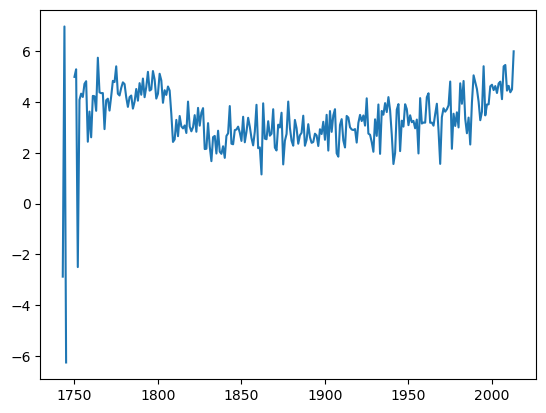

In [40]:
#7. Построить график изменения средней температуры по годам для России за все время измерений.

years = pd.DatetimeIndex(data_russia['dt']).year.tolist()
plt.plot(data_russia.groupby(years)['AverageTemperature'].mean())
plt.show()

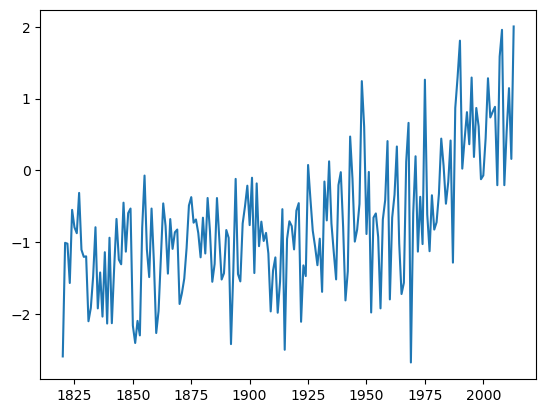

In [49]:
#8. Построить график изменения средней температуры по года для города Благовещенск за все время измерений.
data_Blagoveshchensk = data_russia.loc[data_russia['City'] == 'Blagoveshchensk']
years = pd.DatetimeIndex(data_Blagoveshchensk['dt']).year.tolist()
plt.plot(data_Blagoveshchensk.groupby(years)['AverageTemperature'].mean())
plt.show()

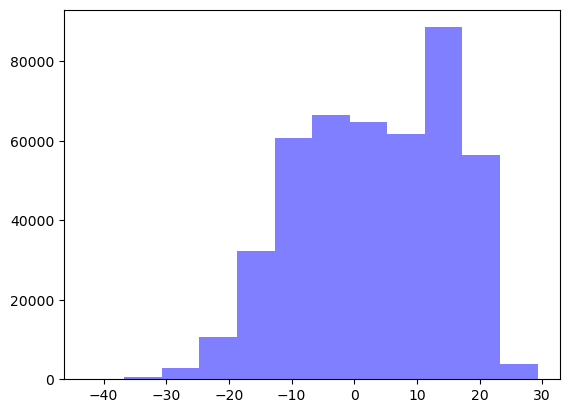

In [50]:
#9. Рассчитать среднюю месячную температуры для России за все время измерений и построить гистограмму распределения.

num_bins = 12
n, bins, patches = plt.hist(data_russia['AverageTemperature'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

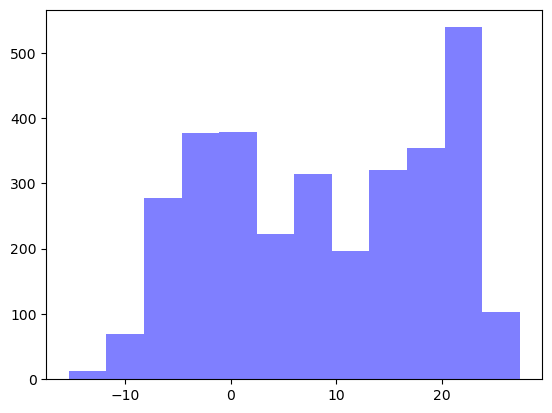

In [51]:
#10. Рассчитать среднюю месячную температуры для города Батайск за все время измерений и построить гистограмму распределения.

n, bins, patches = plt.hist(data_russia.loc[data_russia['City'] == 'Bataysk']['AverageTemperature'], num_bins, facecolor='blue', alpha=0.5)
plt.show()